# Probabilidad con simulación

## Ejercicio 1
Supongamos que tenemos dos monedas idénticas y perfectamente balanceadas.
Si se lanza cada moneda una vez, encuentre:

a) La probabilidad de que ambas monedas muestren **cara**, dado que la primera muestra **cara**.

b) La probabilidad de que ambas monedas muestren **cara**, dado que al menos una de ellas muestra **cara**

In [ ]:
import numpy as np
#inciso a

#Se generan varias repeticiones del experimento
n = int(1e6)
resultados = np.random.choice(['cara','cruz'], size = (n,2))

#Se obtienen los experimentos en los cuales la primera moneda es cara
condicional = resultados[resultados[:,0] == 'cara']

#Se obtienen los experimentos en donde las dos monedas son cara
ambas_cara = resultados[np.logical_and(resultados[:,0] == 'cara',
                                      resultados[:,1] == 'cara')]

#Calcula la probabilidad condicional
proba = ambas_cara.shape[0] / condicional.shape[0]
print('La probabilidad condicional es', round(proba,2))

In [ ]:
# inciso b
#Se obtienen los experimentos en los cuales al menos una moneda es cara
aux = np.logical_or(resultados[:,0] == 'cara',
                                      resultados[:,1] == 'cara')
condicional = resultados[aux]

#Calcula la probabilidad condicional
proba = ambas_cara.shape[0] / condicional.shape[0]
print('La probabilidad condicional es', round(proba,2))


## Ejercicio 2
Si un punto en $\mathbb{R}^2$, dentro del cuadrado unitario $C = \{(x,y): (x,y) \in [0,1] \times[0,1]  \}$ se selecciona al azar y se sabe que está dentro de la región triangular acotada por $x = 0, y = 0, x + y = 1$, encuentre la probabilidad de que este punto también se encuentre dentro del triángulo acotado por $y = 0, x = 1, x = y$.

In [ ]:
#simula los puntos dentro del cuadrado unitario
n = int(1e6)
puntos = np.random.uniform(0, 1, size = (n, 2))

#Localiza los puntos dentro del triángulo 1 (y <= 1 - x)
triangulo1 = puntos[puntos[:,1] <= 1 - puntos[:,0]]

#Localiza los puntos dentro del triángulo 2 (y <= 1 - x and y <= x)
aux = np.logical_and(puntos[:,1] <= 1 - puntos[:,0], 
                    puntos[:,1] <= puntos[:,0])
triangulo2 = puntos[aux]

#Calcula la probabilidad
proba = triangulo2.shape[0] / triangulo1.shape[0]
print('La probabilidad es', round(proba,2))

## Ejercicio 3
Supongamos que tenemos una moneda $A$ que cae en cara con probabilidad $s$ y una moneda $B$ que cae en cara con probabilidad $t$. Si cada moneda se tira de manera alternada, empezando con la moneda $A$, ¿cuál es la probilidad de que la primera cara se obtenga con la moneda $A$?

Considere $s = 0.4$ y $t = .5$

¿Qué puede concluir?

In [ ]:
import numpy as np

#número de simulaciones
n_sim = int(1e5)

#número de tiros por simulación
n_tiros = 100

#contador de casos de éxito (la moneda A es cara)
cont_exitos = 0

#probabilidades de cara para cada moneda
s = 0.4
t = 0.5

for i in range(n_sim):
    #Se empieza tirando la moneda A
    moneda = 'A'
    
    #Boolean para saber si no ha salido ningua cara
    bool_primera_cara = False
    
    for j in range(n_tiros):
        
        #se realiza lanzamiento
        if moneda == 'A':
            resultado = np.random.choice(['cara','cruz'], size = 1, p = [s, 1 - s])
        else:
            resultado = np.random.choice(['cara','cruz'], size = 1, p = [t, 1 - t])
        
        #se revisa la cara obtenida
        if moneda == 'A' and resultado[0] == 'cara':
            cont_exitos = cont_exitos + 1
            break #siguiente simulación
        elif moneda == 'B' and resultado[0] == 'cara':
            break #siguiente simulación
            
        if moneda == 'A':
            moneda = 'B'
        else:
            moneda = 'A'

#Estima probabilidad
proba = cont_exitos / n_sim

print('La probabilidad es', round(proba, 2))



## Ejercicio 4
Se tienen dos urnas. La primera de ellas tiene $a$ esferas rojas y $b$ esferas negras, la otra urna contiene $c$ esferas rojas y $d$ negras.
Si se elige una esfera de cada urna y de estas dos esferas se elige alguna al azar, ¿cuál es la probabilidad de que la esfera sea roja?
Calcule la probabilidad considerando
$$
a = 99, b = 1, c = 1, d = 1
$$

In [1]:
import numpy as np

#Se generan varias repeticiones del experimento
n = int(1e4)

#Contador de éxitos
cont_exito = 0

#urna 1
rojas_1 = 99
negras_1 = 1
total_1 = rojas_1 + negras_1
prob_rojas_1 = rojas_1 / total_1
prob_negras_1 = negras_1 / total_1
vector_prob_1 = [prob_rojas_1, prob_negras_1]

#urna 2
rojas_2 = 1
negras_2 = 1
total_2 = rojas_2 + negras_2
prob_rojas_2 = rojas_2 / total_2
prob_negras_2 = negras_2 / total_2
vector_prob_2 = [prob_rojas_2, prob_negras_2]

#Se simula el experimento
for i in range(n):
    #Se selecciona una esfera de cada urna
    esfera_1 = np.random.choice(['roja','negra'], size = 1, p = vector_prob_1)
    esfera_2 = np.random.choice(['roja','negra'], size = 1, p = vector_prob_2)
    
    #Se selecciona alguna de las dos esferas al azar
    esfera = np.random.choice([esfera_1[0], esfera_2[0]], size = 1)
    
    #Se determina si fue esfera roja (éxito)
    if esfera[0] == 'roja':
        cont_exito = cont_exito + 1
        
#Se calcula la probabilidad de obtener una esfera roja
prob_roja = cont_exito / n

print("La probabilidad de obtener una esfera roja es", round(prob_roja,3))
        


La probabilidad de obtener una esfera roja es 0.745


## Ejercicio 5 (Problema del cumpleaños)
Suponga que se tiene un cuarto con $N \in \{5, 10, 15, 20, \ldots, 100 \}$ personas. Suponiendo que un año tiene 365 días, para cada $N$, calcule la probabilidad de que existan personas que cumplan años el mismo día. Grafique sus resultados

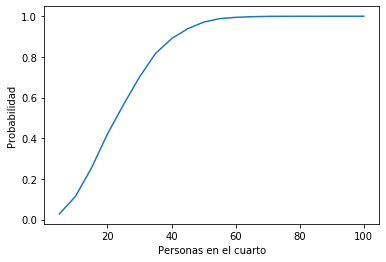

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Número de simulaciones
n_sim = int(1e4)

#Posibles valores de N
N = list(range(5, 105, 5))

#Años de 365 días
dias = list(range(365))

#Para almacenar las probabilidades de cada valor de N
prob = []

for n in N:
    
    #Contador de éxitos
    cont_ex = 0
    
    for i in range(n_sim):
        
        #Obtiene los cumpleaños de cada persona
        cumpleanios = np.random.choice(dias, size = n, replace = True)
        
        #el array unicos es para revisar si hay algún día repetido
        unicos = np.unique(cumpleanios)
        
        #Revisa si algún día se repite
        if len(cumpleanios) != len(unicos):
            cont_ex = cont_ex + 1
            
    #Calcula la probabilidad para el valor de n correspondiente
    prob.append(float(cont_ex) / n_sim)

#Grafica resultados
plt.plot(N, prob, '-')
plt.xlabel('Personas en el cuarto')
plt.ylabel('Probabilidad')
plt.show()

## Ejercicio 6 Cálculo de $\pi$
Utilizando un cuadrado con vértices en los puntos $(1,1), (-1,1), (1,-1), (-1,-1)$ y un círculo con centro en $(0,0)$ y radio igual a $1$, estime el valor de $\pi$.

Primero estime la probabilidad de que, al elegir un punto al azar dentro del cuadrado, este punto se encuentre dentro del círculo.

Haga una gráfica

**NOTA:** No puede utilizar cíclos *for*. Utilie 1e4 simulaciones


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#número de simulaciones
n_sim = int(1e4)

#Puntos dentro del cuadrado
puntos = np.random.uniform(low = -1, high = 1, size = (n_sim, 2))

#puntos dentro de la circunferencia
puntos_circulo = puntos[puntos[:,0]**2 + puntos[:,1]**2 <= 1]

#Probabilidad de que el punto pertenece está dentro del círculo
prob = float(puntos_circulo.shape[0]) / n_sim

#Estimado de pi
pi_estimado = 4 * prob
print("El valor estimado de pi es", round(pi_estimado, 4))



El valor estimado de pi es 3.1564


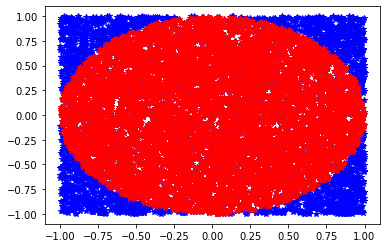

In [4]:
#Gráfica
plt.plot(puntos[:,0], puntos[:,1], '*b')
plt.plot(puntos_circulo[:,0], puntos_circulo[:,1], '*r')
plt.show()